In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle, Circle

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

## Review Poll

Let $C$ be a curve in $\mathbb R^2$, $f$ a continuous function, and $a, b$ scalars. What is the difference between these expressions?
$$ \text{(A) } \int_a^b f(x,y)\,dy \qquad \qquad \text{(B) } \int_C f(x,y)\,dy $$

<p style="padding-bottom:40%;"> </p>

# Lecture 18


## The Fundamental Theorem of Line Integrals

  - Objectives
    - Line integrals of (through) vector fields
    - Conservative vector fields
    - Fundamental Theorem of Line Integrals
      - Relation to path-independence
      - Why "conservative"?

  - Resources
    - [Exercises and Solutions](../exercises/L18-Exercises-Solutions.ipynb)
    - Content
      - Stewart: §16.3
      - New Strang:  
        - [§6.3](https://openstax.org/books/calculus-volume-3/pages/6-3-conservative-vector-fields) 
    - Practice
      - Mooculus: [Line Integrals](https://ximera.osu.edu/mooculus/calculus3/lineIntegrals/digInLineIntegrals) 
    - Extras 
      - CalcBLUE: [Path Independence](https://www.youtube.com/watch?v=Wgd8RA-pagQ&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=23) 

<p style="padding-bottom:40%;"> </p>

## Example

Compute the following line integral 
 $$\int_C (x-y)\,dx + xy\,dy$$ where $C$ is the clockwise section of the circle $x^2 + y^2 = 1$ from $(1,0)$ to $(0,1)$. 

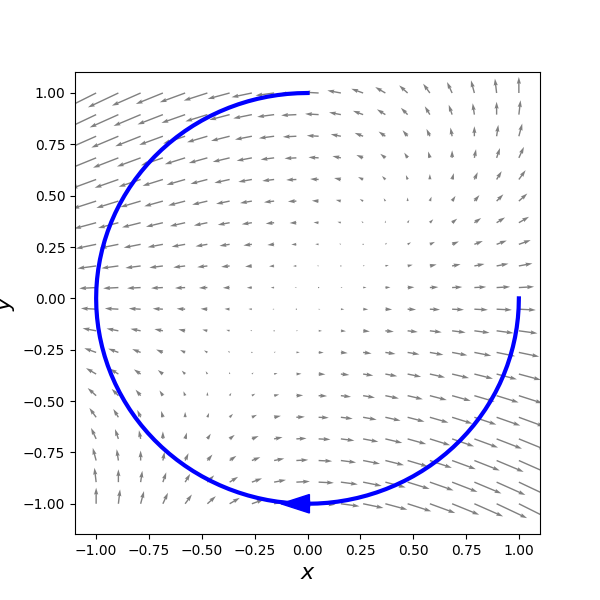

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    x = y = np.linspace(-1,1,20)
    x,y = np.meshgrid(x,y)

    ax.quiver(x,y,x-y,x*y,color='gray');
    for c in 'xy':
    #         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    t= np.linspace(0,1,100)    
    # plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    ax.arrow(0.01,-1,-.001,0,width=.03,color='b')
    ax.plot(cos(t*3*pi/2),-sin(t*3*pi/2),'b',lw=3);
    
    return fig.canvas

a("A Line Integral Example")

<p style="padding-bottom:40%;"> </p>

## Work example

A wagon 5 m away is pulled by a rope from a height 1 m above it with a force of 7 N. How much work is done pulling it the full distance?
<!--![Picture of wagon pulled by rope](../img/wagon.png) -->

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE, figsize = (7.5,3))
    plt.ion()
    
    slider = FloatSlider(min=0, max=5)
    xpos = slider.value

    pl = ax.plot([0+xpos,5],[0,1],'gray')[0]
    ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
    for xx in (-5/3,-1/3):
        ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='gray',alpha=1))
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])
    ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
    for xi in np.arange(0,xpos,1/2):
        ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);
    
    xs = np.linspace(0,2*np.pi, 300)
    # pl = ax.plot(xs, np.cos(xs), color='red')[0]
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])

    def update(change):
        xpos = slider.value
        pl.set_data([0 + xpos,5], [0,1])
        while ax.patches:
            ax.patches.pop()
        ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
        for xx in (-5/3,-1/3):
            ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='gray',alpha=1))

        ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
        for xi in np.arange(0,xpos,1/2):
            ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Wagon")

# @interact(xpos=(0.,5.))
# def _(xpos=0):
#     fig = plt.figure(figsize = (7.5,3))
#     ax = fig.gca()
#     ax.plot([0+xpos,5],[0,1],'gray')
#     ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
#     for xx in (-5/3,-1/3):
#         ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='gray',alpha=1))
#     ax.set_ylim([-1,2])
#     ax.set_xlim([-2.5,5])
#     ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
#     for xi in np.arange(0,xpos,1/2):
#         ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);
#     flush_figures();

In [5]:
quad(lambda t: 7*(5-t) / sqrt((5-t)**2 + 1), 0, 5)[0]

28.69313659514949

<p style="padding-bottom:40%;"> </p>

# Conservative Vector Fields

A vector field $\vec F$ is **conservative** if there exists a scalar field $f$ (with the same domain as $\vec F$ such that $$\vec F = \nabla f.$$

The function $f$ is called a **potential**.

<p style="padding-bottom:40%;"> </p>

### Example

The radial vector field $x \,\vec i + y \vec j$ is conservative. Its potential is $$f(x,y) = \frac{x^2 + y ^2}{2}$$

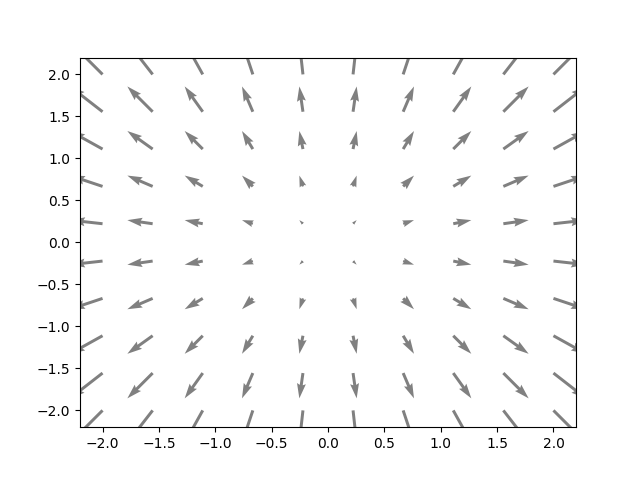

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = linspace(-2,2,10)
    x,y = meshgrid(x,y)
    ax.quiver(x,y,x,y,color='gray');
    
    return fig.canvas

a("A conservative field")

<p style="padding-bottom:40%;"> </p>

What about the circular vector field $-y\,\vec i + x\, \vec j$?

That is, can we find a scalar field $f(x,y)$ with:

\begin{align}
f_x &= -y \\ f_y &= x
\end{align}




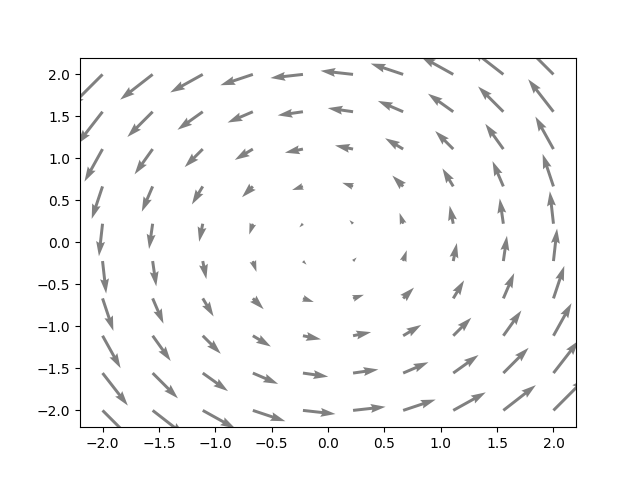

In [7]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    x = y = linspace(-2,2,10)
    x,y = meshgrid(x,y)
    ax.quiver(x, y, -y, x,color='gray');
    
    return fig.canvas

a("A nonconservative field")

<p style="padding-bottom:40%;"> </p>

## No. 

Reason: Clairaut.

$$ f_{xy} = -1 $$
$$ f_{yx} = 1 $$

<p style="padding-bottom:40%;"> </p>

# Example

Which of the following fields is conservative?

  1. $x\,\vec i$
  1. $x\,\vec j$
  1. Both.
  1. Neither.

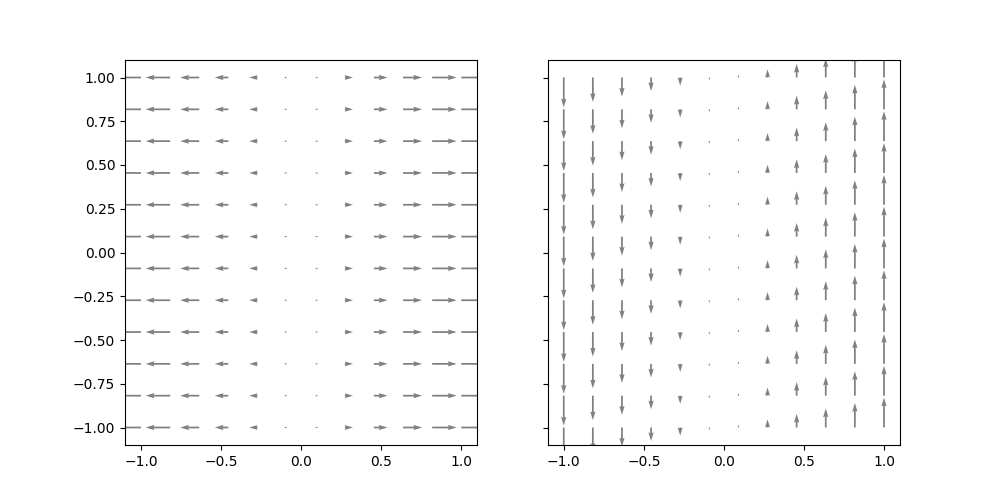

In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig, axs=plt.subplots(1,2,num=TITLE,figsize=(10,5),sharey=True)
    plt.ion()
    
    x = y = linspace(-1,1,12)
    x,y = meshgrid(x,y)
    axs[0].quiver(x,y,x,0,color='gray')
    axs[1].quiver(x,y,0,x,color='gray');
    
    return fig.canvas

a("Which is a gradient?")

<p style="padding-bottom:40%;"> </p>

### Example

Is the following vector field conservative? $$\vec F(x,y) = \langle y e^{xy}, x e^{xy} + y^3 \rangle $$

#### Solution

Check mixed partials. $$P_y = e^{xy} + xy e^{xy} = Q_x \quad ✅ $$

So, we solve $f_x(x,y) = P(x,y) = y e^{xy}$. $$f(x,y) = e^{xy} + g(y)$$ $$f_y(x,y) = x e^{xy} + g'(y) = Q(x,y) = x e^{xy} + y^3 $$ So $g'(y) = y^3$, or $g(y) = \frac14 y^4 + C$. 

$$f(x,y) = e^{xy} + \frac14 y^4 + C $$

####
<p style="padding-bottom:40%;"> </p>

# A line integral through a conservative vector field

What happens when we combine the last two topics: line integrals and conservative vector fields?

$$\int_C \nabla f \cdot d\vec r $$

where $C$ is a piecewise smooth, oriented curve parametrized by $\vec r(t) = \langle x(t),y(t)\rangle$ for $a\leq t \leq b$ and $f$ is a differentiable function. 


<p style="padding-bottom:40%;"> </p>

$$ = \int_a^b \nabla f(\vec r(t)) \cdot \vec r'(t)\, dt $$

$$ = \int_a^b \left( \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt} \right)\, dt $$

$$ = \int_a^b (f\circ \vec r)'(t)\, dt $$

$$ = f(\vec r(b)) - f(\vec r(a))$$

<p style="padding-bottom:40%;"> </p>

# The Fundamental Theorem of Line integrals

Let $C$ be a piecewise-smooth, oriented curve from point $(x_1,y_1)$ to point $(x_2,y_2)$ and $\vec F$ a continuous, conservative vector field with potential $f$. (That is, $\nabla f = \vec F$.)  Then, $$\int_C \vec F\cdot d\vec r = f(x_2,y_2) - f(x_1,y_1).$$

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    r   = lambda t: np.array(((1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2))
    r2  = lambda t: np.array(((1 - t)*1 + 1.25*t, t*(2 - sin(8)/2)))
    rp  = lambda t: np.array((-4*pi*(1+t/4)*sin(4*pi*t) + 1/4*cos(4*pi*t)  ,2 - 4*cos(8*t)))
    r2p = lambda t: np.array((.25, (2 - sin(8)/2)))

    
    
    t = np.linspace(0,1,100)
    
    slider = FloatSlider(min=0, max = 1, step=0.01)
    sliders = FloatSlider(min=0, max = 1, step=0.01)
    b = slider.value
    s = sliders.value
    
    ax.plot(*(r(t)),'-g',zorder=2)
    pl = ax.plot(*(r(t*b)),'-g',zorder=3, lw=4)[0]
    ax.plot(*(r2(t)),'-b',zorder=2)
    pl2 = ax.plot(*(r2(t*b)),'-b',zorder=3, lw=4)[0]

    ax.text(-.7,.45,"$C_1$",fontsize=30,color='g',zorder=2);
    ax.text(1.2,.5,"$C_2$",fontsize=30,color='b',zorder=2);
    
    u = np.linspace(-1.2,1.3,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    
    q = ax.quiver(x,y,2*x,y/2,alpha = 1,color='gray');
    u = np.linspace(-1.2,1.3,55) 
    v = np.linspace(-1,2,55)
    x,y = np.meshgrid(u,v)
    
    c = ax.contour(x,y,x**2 + y**2/4 - 1,alpha=0, levels=arange(-1.5,1.7,3/8))
    
    def Fr(t):
        X, Y = r(t)
        U, V = rp(t)
        return 2*X*U + Y/2 * V
    def Fr2(t):
        X, Y = r2(t)
        U, V = r2p(t)
        return 2*X*U + Y/2 * V
    
    iiint = quad(Fr, 0, b)[0]
    iiint2 = quad(Fr2, 0, b)[0]

    ax.set_title(f"$\\int_{{C_1}} \\mathbf{{F}} \\cdot d\\mathbf{{r}} = {iiint:.03f} \\quad\\quad\\int_{{C_2}} \\mathbf{{F}} \\cdot d\\mathbf{{r}} = {iiint2:.03f}$")
    plt.clabel(c);
#     plt.colorbar();
    
    def update(change):
        s = sliders.value
        c.set_alpha(s)
        q.set_alpha(1 - s)
        [x.set_alpha(s) for x in c.collections]
        # print(c.collections)
    
    sliders.observe(update, names='value')

    def updateb(change):
        b = slider.value
        pl.set_data(*(r(t*b)))
        pl2.set_data(*(r2(t*b)))
        iiint = quad(Fr, 0, b)[0]
        iiint2 = quad(Fr2, 0, b)[0]

        ax.set_title(f"$\\int_{{C_1}} \\mathbf{{F}} \\cdot d\\mathbf{{r}} = {iiint:.03f} \\quad\\quad\\int_{{C_2}} \\mathbf{{F}} \\cdot d\\mathbf{{r}} = {iiint2:.03f}$")

    
    sliders.observe(update, names='value')
    slider.observe(updateb, names='value')
    
    return VBox([HBox([sliders, slider]), fig.canvas])

a("FTLI")

<p style="padding-bottom:40%;"> </p>

## Theorem

The following statements are equivalent regarding a continuous vector field $\vec F$.

  - $\vec F$ is conservative.

  - $\oint_C \vec F\cdot d\vec r = 0$ on every closed curve $C$.

  - $\int_C \vec F\cdot d\vec r$ depends only on the endpoints of $C$, i.e., is path-independent.

In [10]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()

    slider = FloatSlider(min=0, max = 1, step=0.01)
    s = slider.value
    
    x = y = linspace(-1,1,18)
    x,y = meshgrid(x,y)
    plt.title("$\\langle y,x \\rangle$",fontsize=20)
    q = plt.quiver(x,y,y,x,color='gray');    
    c = plt.contour(x,y,x*y,alpha=s,levels=15)
    plt.clabel(c);
    
    def update(change):
        s = slider.value
        c.set_alpha(s)
        q.set_alpha(1 - s)
        [x.set_alpha(s) for x in c.collections]
        
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Another Conservative Field")

<p style="padding-bottom:40%;"> </p>

## Why "conservative"?

In physics, we say a force field $\vec F$ has potential $f$ if $\vec F = -\nabla f$. (Note: this does not change which fields are conservative; it is just a sign convention.)

Let $\vec r(t) $ for $t \in [a,b]$ be the position of a particle with mass $m$ moving in this force field. We compute the work done by the force in two ways. 

$$ \int_C \vec F\cdot d\vec r = \int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt $$

using $\vec F = m \vec a = m \vec r''(t) $,

$$ = \int_a^b m\vec r''(t)\cdot \vec r'(t)\,dt $$

Here's the key step: 

$$ = \int_a^b \frac{d}{dt}\left( \frac 12 m\, \vec r'(t)\cdot \vec r'(t) \right)\,dt $$

$$= \frac 12 m\, \vec r'(b)\cdot \vec r'(b) - \frac 12\, m \vec r'(a)\cdot \vec r'(a) $$

$$= \frac12m |\vec v(b)|^2 - \frac12 m|\vec v(a)|^2 $$

A second way:

$$ \int_C \vec F\cdot d\vec r = \int_C -\nabla f\cdot d\vec r $$

using FTLI,

$$ = -f(\vec r(b)) + f(\vec r(a)) $$

Putting these together we get...

<div class="alert alert-block alert-success shadow">
<strong>Conservation of Energy</strong>
    
$$ f(\vec r(a)) + \frac12m|\vec v(a)|^2 =  f(\vec r(b)) + \frac12m|\vec v(b)|^2 $$

</div>

